In [1]:
import numpy
import os
import json
import csv
import pandas as pd
import numpy as np
np.random.seed(42)

In [2]:
path = "../../data"

In [3]:
file = "605_output.csv"

In [4]:
data = pd.read_csv(os.path.join(path,file),header=None)
unbalancedData = pd.read_csv(os.path.join(path,file),header=None)

FileNotFoundError: File b'../../data/605_output.csv' does not exist

In [52]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,Kuntal-01234567891011121314,-1.647343,-1.956522,-1.562802,-1.115942,-1.084541,-1.118357,-0.971014,127.000000,-0.979311,...,-0.974107,0.135282,0.075168,-0.164765,-0.284128,0.114503,-0.953859,-2.047356,0.502973,0
1,Kuntal-123456789101112131415,-2.745819,-3.035117,-3.526756,-1.448161,-1.683946,-0.836120,-0.968227,-32.822742,-0.980840,...,-0.968620,0.148120,0.071493,-0.186080,-0.311107,0.090873,-0.946353,-0.615007,-0.347080,0
2,Kuntal-2345678910111213141516,-1.618333,-1.761667,-1.893333,-1.003333,-0.115000,-0.823333,-0.950000,-122.951667,-0.979620,...,-0.969767,0.141327,0.077840,-0.182693,-0.297033,0.109987,-0.948740,-1.412507,-0.042927,0
3,Kuntal-34567891011121314151617,-2.436242,-2.174497,-2.374161,-0.748322,-0.817114,-0.701342,-0.877517,-127.332215,-0.976527,...,-0.969813,0.135200,0.079667,-0.186593,-0.286800,0.115673,-0.951233,-1.129173,-1.361653,0
4,Kuntal-456789101112131415161718,-1.081940,-1.645485,-1.613712,-0.735786,-0.476589,-0.551839,-0.946488,-1.994983,-0.971327,...,-0.965221,0.144201,0.077866,-0.203309,-0.306201,0.102866,-0.947826,-1.374168,0.086832,0


In [6]:
mins = data.min().values

In [7]:
mins[1:18],mins[19:36],mins[37:54]

(array([-128.0, -128.0, -128.0, -128.0, -128.0, -128.0, -128.0, -128.0,
        -0.9962333333333336, -0.9980135135135147, -0.9990536912751669,
        -0.9969848484848488, -1.0351006711409396, -1.0888399999999996,
        -1.0576778523489938, -72.26845637583892, -92.37037333333332],
       dtype=object),
 array([-128.0, -128.0, -128.0, -128.0, -128.0, -128.0, -128.0,
        -0.9962333333333336, -0.9980135135135147, -0.9990536912751669,
        -0.9969848484848488, -1.0351006711409396, -1.0888399999999996,
        -1.0576778523489938, -72.26845637583892, -92.37037333333332,
        -128.0], dtype=object),
 array([-128.0, -128.0, -128.0, -128.0, -128.0, -128.0,
        -0.9962333333333336, -0.9980135135135147, -0.9990536912751669,
        -0.9969848484848488, -1.0351006711409396, -1.0888399999999996,
        -1.0576778523489938, -72.26845637583892, -92.37037333333332,
        -128.0, -128.0], dtype=object))

In [8]:
maxs = data.max().values
maxs[1:18],maxs[19:36],maxs[37:54]

(array([127.0, 104.23745819397993, 127.0, 77.01520270270271, 127.0, 127.0,
        127.0, 127.0, 0.9982600000000004, 0.994000000000004,
        0.9937066666666676, 0.9988333333333312, 1.0430067567567571, 1.107,
        1.0143154362416105, 75.6648523489933, 80.64663999999998],
       dtype=object),
 array([104.23745819397993, 127.0, 77.01520270270271, 127.0, 127.0, 127.0,
        127.0, 0.9982600000000004, 0.994000000000004, 0.9937066666666676,
        0.9988333333333312, 1.0430067567567571, 1.107, 1.0143154362416105,
        75.6648523489933, 80.64663999999998, 127.0], dtype=object),
 array([127.0, 77.01520270270271, 127.0, 127.0, 127.0, 127.0,
        0.9982600000000004, 0.994000000000004, 0.9937066666666676,
        0.9988333333333312, 1.0430067567567571, 1.107, 1.0143154362416105,
        75.6648523489933, 80.64663999999998, 127.0, 104.23745819397993],
       dtype=object))

In [9]:
for index,mx in enumerate(maxs):
    if mx == 1:
        print(index,mx)
for index,mx in enumerate(mins):
    if mx == 0:
        print(index,mx)

256 1
256 0


In [235]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,82,83,84,85,86,87,88,89,90,91
count,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,...,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000,77650.000000
mean,-0.777542,-0.873216,-0.876900,-1.009017,-1.036962,-1.163109,-0.914304,2.347298,0.009292,0.003833,...,0.003866,0.021108,0.017718,0.073233,-0.008151,-0.560661,-1.873787,-0.344746,-0.080733,0.040966
std,3.776072,2.452859,3.590234,2.560399,3.588994,3.651082,3.554321,18.512123,0.616889,0.310598,...,0.310630,0.343409,0.623886,0.454968,0.464927,0.505882,6.837621,6.617708,7.175411,0.198212
min,-128.000000,-128.000000,-128.000000,-128.000000,-128.000000,-128.000000,-128.000000,-128.000000,-0.996233,-0.998014,...,-0.998014,-0.999054,-0.996985,-1.035101,-1.088840,-1.057678,-72.268456,-92.370373,-87.275460,0.000000
25%,-1.164979,-1.209030,-1.332776,-1.179306,-1.294314,-1.272727,-1.205686,-1.111667,-0.578690,-0.192070,...,-0.192062,-0.184836,-0.556320,-0.254463,-0.306719,-0.917796,-3.082077,-0.974547,-0.493183,0.000000
50%,-0.956081,-0.979730,-1.031879,-0.972973,-1.058528,-1.010161,-0.995172,-0.595318,0.012393,0.009341,...,0.009358,0.030054,0.007658,0.088150,0.011134,-0.772983,-1.447107,-0.250872,0.179977,0.000000
75%,-0.695652,-0.777592,-0.744147,-0.739796,-0.801695,-0.711864,-0.747492,2.680602,0.585452,0.173000,...,0.173034,0.220161,0.619970,0.405717,0.286311,-0.363781,-1.071767,0.253300,0.570412,0.000000
max,127.000000,104.237458,127.000000,77.015203,127.000000,127.000000,127.000000,127.000000,0.998260,0.994000,...,0.994000,0.993707,0.998833,1.043007,1.107000,1.014315,75.664852,80.646640,77.100000,1.000000


In [56]:
noneatData = data[data[data.columns[256]]==0]

In [57]:
eatData = data[data[data.columns[256]]==1]

In [58]:
print(noneatData.shape,eatData.shape)

(74429, 257) (3181, 257)


In [59]:
noneatData = noneatData.sample(n=3181)

In [60]:
print(noneatData.shape,eatData.shape)

(3181, 257) (3181, 257)


### Data Vectorization

In [61]:
data = pd.concat([noneatData,eatData])

In [62]:
X_data = np.array(data[data.columns[1:256]].values.tolist())
X_unbalancedData = np.array(unbalancedData[unbalancedData.columns[1:256]].values.tolist())

In [63]:
#data[data.columns[134]].head()
X_data[0].shape

(255,)

In [64]:
print (X_data.shape,X_unbalancedData.shape)

(6362, 255) (77610, 255)


In [65]:
Y_data = np.array(data[data.columns[256]].values.tolist())
Y_unbalancedData = np.array(unbalancedData[unbalancedData.columns[256]].values.tolist())

In [29]:
print(Y_data.shape,Y_unbalancedData.shape)

(77610,) (77610,)


### Feature Selection

#### L1-based feature selection

In [258]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [53]:
# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_data, Y_data)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X_data)
# X_new.shape

#### Tree-based feature selection (Works very good)

In [54]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

# clfTree = ExtraTreesClassifier(n_estimators=50)
# clfTree = clfTree.fit(X_data, Y_data)
# print (clfTree.feature_importances_)  

# model = SelectFromModel(clfTree, prefit=True)
# X_new = model.transform(X_data)
# print (X_new.shape)

In [55]:
# X_unbalanced_new = model.transform(X_unbalancedData)
# print(X_unbalanced_new.shape)

### Classification

In [23]:
from xgboost import XGBClassifier

In [24]:
clf = XGBClassifier(n_jobs=-1,verbosity=2)

In [69]:
X_new = X_data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_data, test_size=0.30, random_state=42, shuffle =True)

In [31]:
print (y_train)

[0 1 0 ... 0 0 0]


In [32]:
X_train[-1],X_train[-2],y_train[-1],y_train[-2]

(array([-1.0016835 , -1.38552189, -1.01683502, -1.01178451, -1.08922559,
        -1.03872054, -1.1026936 , -1.08585859, -0.66132215, -0.25524161,
        -0.12991275,  0.69322148,  0.1674698 , -0.53836913, -0.88621477,
        -4.2545906 ,  0.22021477, -1.01013514, -0.99324324, -1.17060811,
        -1.12331081, -0.94425676, -1.125     , -1.05743243, -1.12331081,
        -0.67092667, -0.25321333, -0.12504   ,  0.68549333,  0.17864   ,
        -0.52681333, -0.89018667, -1.30502   ,  0.23998667, -0.69333333,
        -1.10833333, -1.07166667, -0.99      , -1.04666667, -0.88666667,
        -1.12333333, -0.67666667, -0.68608   , -0.24159333, -0.12426667,
         0.67395333,  0.17176667, -0.50783333, -0.90249333, -4.90913333,
        -2.47416667, -1.00841751, -1.10774411, -1.10606061, -0.95117845,
        -0.97306397, -1.09427609, -1.08754209, -1.62457912, -0.7135473 ,
        -0.21438514, -0.12387162,  0.65546622,  0.15288514, -0.46958784,
        -0.92816216, -3.15672973, -1.03293243, -1.0

In [33]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, verbosity=2)

In [34]:
from sklearn.metrics import accuracy_score
preds_val = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.42%


#### Parameter Search by GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV

def xgboost_param_selection(XData, yData, nfolds):
    param_grid = {'n_estimators':(100,100,1000), 
              'max_depth': range(1, 20, 5)}
    grid_search = GridSearchCV(XGBClassifier(cache_size=2000), param_grid, cv=nfolds, n_jobs=-1, verbose=2)
    grid_search.fit(XData, yData)
    grid_search.best_params_
    return grid_search.best_params_

In [36]:
best_params = xgboost_param_selection(X_train,y_train,5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 34.9min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 49.3min finished


In [37]:
best_params

{'max_depth': 6, 'n_estimators': 1000}

In [41]:
clf = XGBClassifier(max_depth=6,n_estimators=1000,verbose=2)
#clf = SVC(gamma=0.001, C=0.1, kernel = 'linear')

In [76]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=2)

#### Testing Accuracy

In [77]:
preds_val = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.19%


In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, preds_val)

array([[898,  64],
       [ 66, 881]])

In [80]:
preds_val.shape

(1909,)

In [81]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[898  64]
 [ 66 881]]


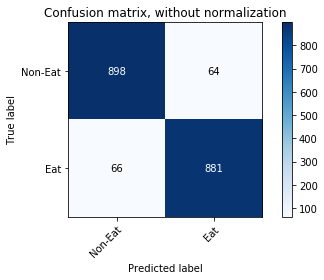

In [82]:
plot_confusion_matrix(y_test, preds_val,np.array(['Non-Eat','Eat']))

#### Testing with Unbalanced data (77670 samples)

In [83]:
#print(X_unbalanced_new.shape)
X_unbalanced_new = X_unbalancedData
preds_val_unbalanced = clf.predict(X_unbalanced_new)
accuracy = accuracy_score(Y_unbalancedData, preds_val_unbalanced)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.17%


Confusion matrix, without normalization
[[69193  5236]
 [   68  3113]]


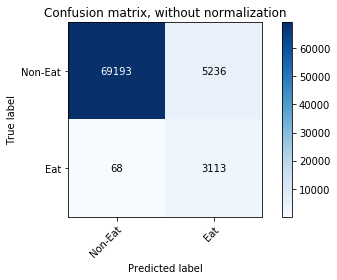

In [84]:
plot_confusion_matrix(Y_unbalancedData, preds_val_unbalanced,np.array(['Non-Eat','Eat']))

### Training Accuracy

In [85]:
print(X_train.shape)
preds_val_train = clf.predict(X_train)
accuracy = accuracy_score(y_train, preds_val_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(4453, 255)
Accuracy: 99.69%


Confusion matrix, without normalization
[[2207   12]
 [   2 2232]]


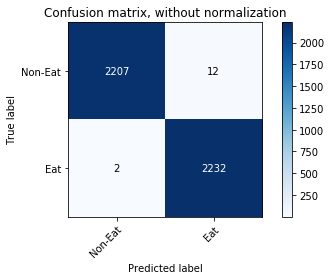

In [86]:
plot_confusion_matrix(y_train, preds_val_train,np.array(['Non-Eat','Eat']))

## LightGBM

In [87]:
from lightgbm import LGBMClassifier

model1 = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=42, n_jobs=-1, silent=True, importance_type='split',)

In [88]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':(100,100,1000), 
              'max_depth': range(1, 20, 5),
             }
    

In [89]:
model1.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [90]:
gs_clf = GridSearchCV(model1,parameters, cv=5, n_jobs=-1,verbose=2)

In [91]:
print (X_train.shape, y_train.shape)
model = gs_clf.fit(X_train, y_train)

(4453, 255) (4453,)
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:   48.5s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


In [92]:
print(model.best_params_)
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, model.best_params_[param_name]))

{'max_depth': 16, 'n_estimators': 1000}
max_depth: 16
n_estimators: 1000


In [93]:
from sklearn.metrics import accuracy_score
preds_val = model.predict(X_test)
accuracy = accuracy_score(y_test, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.92%


Confusion matrix, without normalization
[[903  59]
 [ 57 890]]


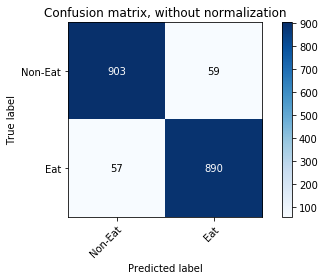

In [94]:
plot_confusion_matrix(y_test, preds_val,np.array(['Non-Eat','Eat']))

#### Training Accuracy

In [95]:
from sklearn.metrics import accuracy_score
preds_val_train = model.predict(X_train)
accuracy = accuracy_score(y_train, preds_val_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.69%


Confusion matrix, without normalization
[[2207   12]
 [   2 2232]]


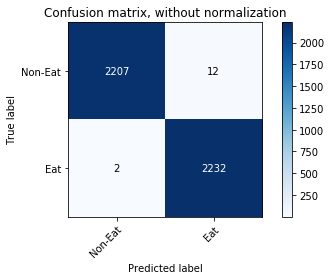

In [96]:
plot_confusion_matrix(y_train, preds_val_train,np.array(['Non-Eat','Eat']))

#### Test with unbalanced data

In [97]:
from sklearn.metrics import accuracy_score
preds_val = model.predict(X_unbalanced_new)
accuracy = accuracy_score(Y_unbalancedData, preds_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.68%


Confusion matrix, without normalization
[[69580  4849]
 [   59  3122]]


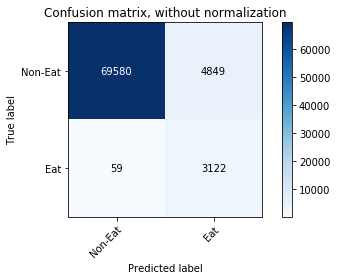

In [98]:
plot_confusion_matrix(Y_unbalancedData, preds_val,np.array(['Non-Eat','Eat']))